### Student Details

Student name: Lin Yuan Chong

Student ID: 22249516

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [27]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

Y_train = train_df['attack_category']
Y_test = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
X_train = train_df[numeric_cols]   
X_test = test_df[numeric_cols]

print(X_train.shape)
print(X_test.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [28]:
# Check train data.
X_train.sample(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
5691,0,0,0,0,0,0,0,0,0,0,...,255,6,0.02,0.08,0.00,0.0,1.00,1.0,0.00,0.0
22528,0,0,0,0,0,0,0,0,0,0,...,255,5,0.02,0.08,0.00,0.0,0.00,0.0,1.00,1.0
12376,0,647,329,0,0,0,0,0,0,0,...,255,102,0.40,0.03,0.00,0.0,0.00,0.0,0.00,0.0
13600,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.91,0.00,0.0,0.03,0.0,0.97,1.0
18173,2630,147,105,0,0,0,0,0,0,0,...,255,1,0.00,0.87,0.98,0.0,0.00,0.0,0.00,0.0


In [29]:
# Check test data.
X_test.sample(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
13787,0,208,2393,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
15564,0,0,44,0,0,0,0,0,0,0,...,255,135,0.53,0.43,0.0,0.0,0.42,0.79,0.42,0.01
896,0,0,0,0,0,0,0,0,0,0,...,255,3,0.01,0.06,0.0,0.0,0.00,0.00,1.00,1.00
17660,0,0,0,0,0,0,0,0,0,0,...,255,19,0.07,0.06,0.0,0.0,0.00,0.00,1.00,1.00
10660,0,217,628,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

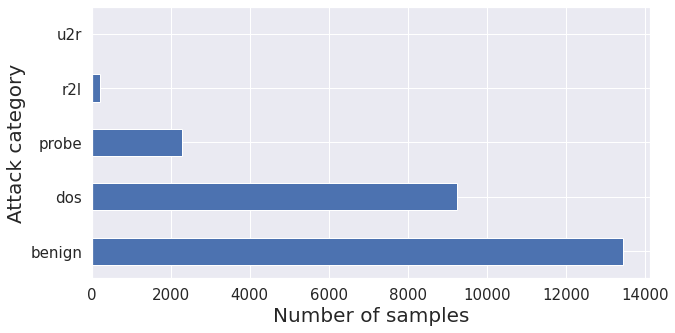

In [30]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np

%matplotlib inline

In [32]:
# Declare scaler.
stdScaler = StandardScaler()

# Fit train_X.
stdScaler.fit(X_train)

# Transform on X_train and X_test.
X_train_std = stdScaler.transform(X_train)
X_test_std = stdScaler.transform(X_test)

# Check mean of scaler.
print(stdScaler.mean_)

[3.05054104e+02 2.43306282e+04 3.49184717e+03 2.37376945e-02
 3.96951413e-05 1.98039060e-01 1.19085424e-03 2.27850111e-01
 2.49841219e-01 1.47268974e-02 3.57256272e-04 4.32677040e-03
 8.45911797e+01 2.76987536e+01 2.86337726e-01 2.83762305e-01
 1.18630121e-01 1.20260400e-01 6.60558908e-01 6.23630518e-02
 9.59308511e-02 1.82532074e+02 1.15063036e+02 5.19790807e-01
 8.25385043e-02 1.47452763e-01 3.18442363e-02 2.85800254e-01
 2.79846380e-01 1.17800095e-01 1.18769451e-01]


In [33]:
# Declare Support Vector Classification.
clf = SVC(kernel='linear')
# Fit the training dataset.
clf.fit(X_train_std, Y_train)

SVC(kernel='linear')

In [34]:
# Predict the category of the network attack.
pred_Y = clf.predict(X_test_std)
print(pred_Y)

['dos' 'dos' 'benign' ... 'benign' 'benign' 'probe']



Accuracy Score: 73.09 %

Confusion matrix:


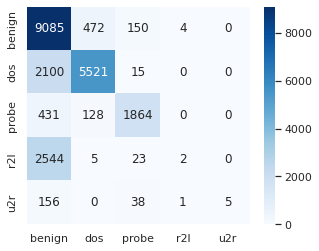

In [35]:
# Confusion matrix and accuracy.
cm = confusion_matrix(Y_test, pred_Y)
ac = accuracy_score(Y_test, pred_Y)

print("\nAccuracy Score:", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

<span style="color:red">Insert your text answers below</span>.

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`.
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

In [36]:
# Declare scaler.
mmScaler = MinMaxScaler()

# Fit and transform X_train and X_test.
mmScaler.fit(X_train)
mmScaler.fit(X_test)

# Transform on X_train and X_test.
X_train_mmstd = mmScaler.transform(X_train)
X_test_mmstd = mmScaler.transform(X_test)

# Check per feature minimum seen in the data.
print(mmScaler.data_min_)

# Check per feature maximum seen in the data.
print(mmScaler.data_max_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[5.7715000e+04 6.2825648e+07 1.3459270e+06 3.0000000e+00 3.0000000e+00
 1.0100000e+02 4.0000000e+00 7.9600000e+02 8.7800000e+02 1.0000000e+02
 5.0000000e+00 4.0000000e+00 5.1100000e+02 5.1100000e+02 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 2.5500000e+02 2.5500000e+02 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00]


In [37]:
# Calculate variance.
var = np.var(a=X_train_mmstd, axis=0)
var

array([2.16669130e-03, 1.47242478e-03, 4.35578162e-03, 7.52357388e-03,
       4.41039618e-06, 4.54896681e-04, 1.28920576e-04, 1.71266060e-04,
       1.71574597e-04, 2.80467463e-05, 1.42851456e-05, 6.06661792e-04,
       5.03577971e-02, 2.01111272e-02, 2.00080371e-01, 2.00336829e-01,
       1.01594642e-01, 1.03895955e-01, 1.93273354e-01, 3.18788356e-02,
       6.58321440e-02, 1.50702073e-01, 1.88269735e-01, 2.01542640e-01,
       3.50391220e-02, 9.50861799e-02, 1.22263384e-02, 1.98298891e-01,
       1.98975298e-01, 9.35522817e-02, 1.00696533e-01])

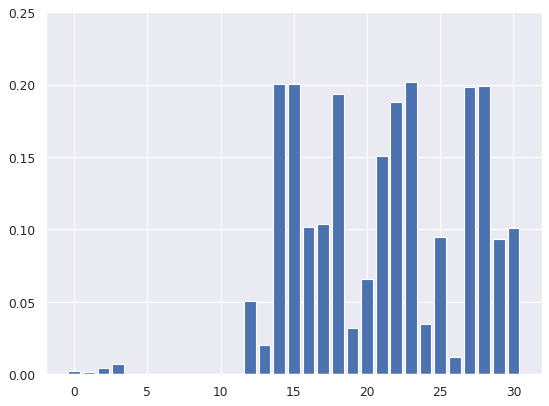

In [38]:
# Figure size and y limit.
figure(figsize=(8, 6), dpi=80)
plt.ylim(0, 0.25)

# Plot.
plt.bar(np.arange(len(var)), var)
plt.show()

In [39]:
# Fit the output of the MinMaxScaler
vThresh = VarianceThreshold(threshold=0.01)
vThresh.fit(X_train_mmstd)

# Transform the data that was scaled with the StandardScaler.
X_train_selFeat = vThresh.transform(X_train_std)
X_test_selFeat = vThresh.transform(X_test_std)

# Initialize a new SVC.
clf1 = SVC(kernel='linear')

# Fitting the selected features into SVC.
clf1.fit(X_train_selFeat, Y_train)

# Predict using the selected features.
pred_Y = clf1.predict(X_test_selFeat)


Accuracy Score: 72.86 %

Confusion matrix:


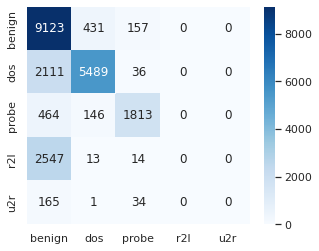

In [40]:
# Confusion matrix and accuracy.
cm = confusion_matrix(Y_test, pred_Y)
ac = accuracy_score(Y_test, pred_Y)

print("\nAccuracy Score:", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

<span style="color:red">Insert your text answers below</span>.

### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features? 

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# A list to store all accuracies.
accuracies = []

# k from 1 to 31.
for i in range(1, 32):

  # Selecting k number of best features.
  kBest = SelectKBest(score_func=f_classif, k=i)
  kBest.fit(X_train_std, Y_train)
  
  # Transform the data that was scaled with the StandardScaler.
  X_train_kBest = kBest.transform(X_train_std)
  X_test_kBest = kBest.transform(X_test_std)

  # Initialize SVC.
  clf2 = SVC(kernel='linear')

  # Fit and predict.
  clf2.fit(X_train_kBest, Y_train)
  pred_Y = clf2.predict(X_test_kBest)

  # Accuracy score.
  ac = round((accuracy_score(Y_test, pred_Y)) * 100, 2)
  # Append accuracy score into list.
  accuracies.append(ac)

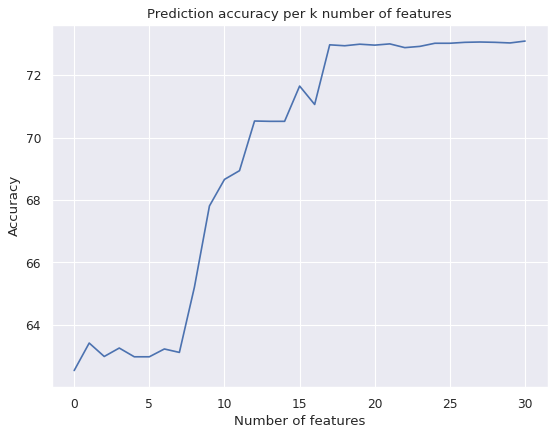

In [42]:
import matplotlib.pyplot as plt

figure(figsize=(8, 6), dpi=80)

plt.plot(accuracies)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Prediction accuracy per k number of features')
plt.show()

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [43]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

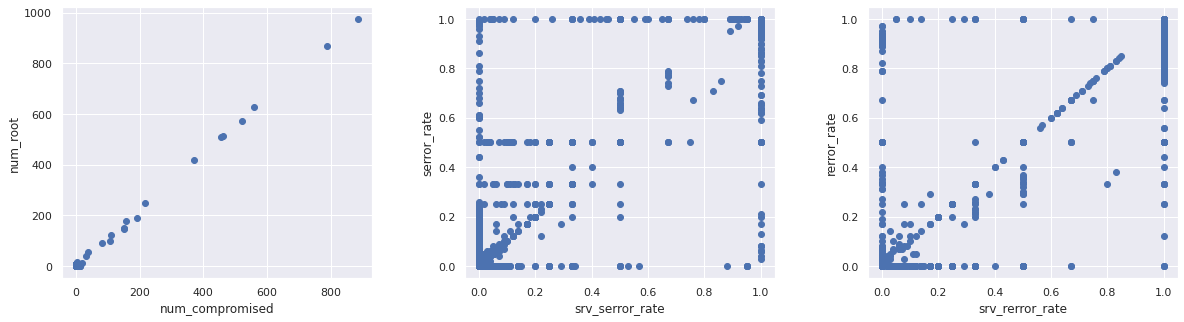

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

X_train_pca95 shape: (25192, 19)

Accuracy Score (95% variance): 72.79 %

Confusion matrix:


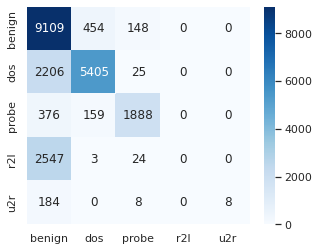

In [58]:
from sklearn.decomposition import PCA

# Declare PCA(desired variance 95%).
pca95 = PCA(n_components=0.95)
pca95.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca95 = pca95.transform(X_train_std)
X_test_pca95 = pca95.transform(X_test_std)

# Initialize SVC.
clf3 = SVC(kernel='linear')

# Fit and predict
clf3.fit(X_train_pca95, Y_train)
pred_Y = clf3.predict(X_test_pca95)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca95.shape)
print("\nAccuracy Score (95% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

X_train_pca95 shape: (25192, 23)

Accuracy Score (99% variance): 73.02 %

Confusion matrix:


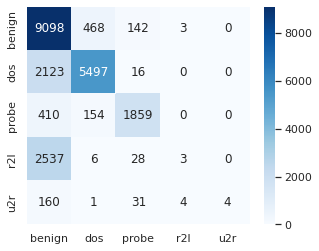

In [59]:
# Declare PCA(desired variance 99%).
pca99 = PCA(n_components=0.99)
pca99.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca99 = pca99.transform(X_train_std)
X_test_pca99 = pca99.transform(X_test_std)

# Initialize SVC.
clf4 = SVC(kernel='linear')

# Fit and predict
clf4.fit(X_train_pca99, Y_train)
pred_Y = clf4.predict(X_test_pca99)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca99.shape)
print("\nAccuracy Score (99% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

X_train_pca95 shape: (25192, 28)

Accuracy Score (99.9% variance): 72.98 %

Confusion matrix:


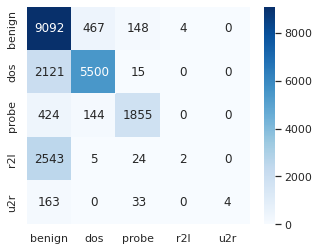

In [60]:
# Declare PCA(desired variance 99.9%).
pca999 = PCA(n_components=0.999)
pca999.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca999 = pca999.transform(X_train_std)
X_test_pca999 = pca999.transform(X_test_std)

# Initialize SVC.
clf5 = SVC(kernel='linear')

# Fit and predict
clf5.fit(X_train_pca999, Y_train)
pred_Y = clf5.predict(X_test_pca999)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca999.shape)
print("\nAccuracy Score (99.9% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

X_train_pca95 shape: (25192, 16)

Accuracy Score (90% variance): 72.63 %

Confusion matrix:


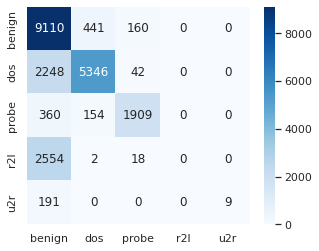

In [61]:
# Declare PCA(desired variance 90%).
pca90 = PCA(n_components=0.90)
pca90.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca90 = pca90.transform(X_train_std)
X_test_pca90 = pca90.transform(X_test_std)

# Initialize SVC.
clf6 = SVC(kernel='linear')

# Fit and predict
clf6.fit(X_train_pca90, Y_train)
pred_Y = clf6.predict(X_test_pca90)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca90.shape)
print("\nAccuracy Score (90% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

X_train_pca95 shape: (25192, 14)

Accuracy Score (85% variance): 72.27 %

Confusion matrix:


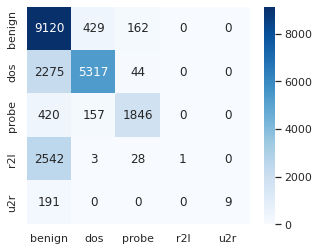

In [62]:
# Declare PCA(desired variance 85%).
pca85 = PCA(n_components=0.85)
pca85.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca85 = pca85.transform(X_train_std)
X_test_pca85 = pca85.transform(X_test_std)

# Initialize SVC.
clf7 = SVC(kernel='linear')

# Fit and predict
clf7.fit(X_train_pca85, Y_train)
pred_Y = clf7.predict(X_test_pca85)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca85.shape)
print("\nAccuracy Score (85% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

X_train_pca95 shape: (25192, 12)

Accuracy Score (80% variance): 71.85 %

Confusion matrix:


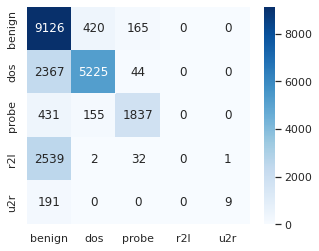

In [64]:
# Declare PCA(desired variance 80%).
pca80 = PCA(n_components=0.80)
pca80.fit(X_train_std)

# Transform the data that was scaled with the StandardScaler.
X_train_pca80 = pca80.transform(X_train_std)
X_test_pca80 = pca80.transform(X_test_std)

# Initialize SVC.
clf8 = SVC(kernel='linear')

# Fit and predict
clf8.fit(X_train_pca80, Y_train)
pred_Y = clf8.predict(X_test_pca80)

# Accuracy.
ac = accuracy_score(Y_test, pred_Y)
cm = confusion_matrix(Y_test, pred_Y)
print("X_train_pca95 shape:", X_train_pca80.shape)
print("\nAccuracy Score (80% variance):", round(ac * 100, 2), "%")
print("\nConfusion matrix:")

# Show cf.
sns.set(rc={'figure.figsize':(5, 4)})
x_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']
y_axis_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.show()

<span style="color:red">Insert your text answers below</span>.

## 1) How many features are there after the PCA?

Variance: 95%, 19 features.

Variance: 99%, 23 features.

Variance: 99.9%, 28 features

Variance: 90%, 16 features.

Variance: 85%, 14 features.

Variance: 80%, 12 features.

## 2) Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy

Accuracy Score (standard): 73.09 %

Models before scaling tend to have higher accuracy compared to after scaling.

## 3) How about if we set the variance to 99%? And how about 99.9%?

Accuracy Score (99% variance): 73.02 %

Accuracy Score (99.9% variance): 72.98 %

Although just a slight difference in variance, the overall accuracy is still affected.

# 4) Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

No.

# Task 3: Exploration

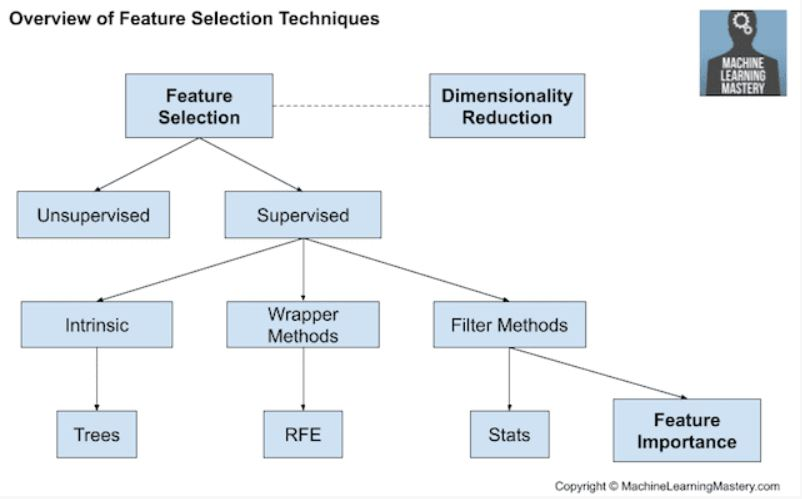




The figure above shows feature selection is mainly broken down into two sections: unsupervised and supervised. Unsupervised methods do not use the target variable (e.g. remove redundant variables), an example of this is the correlation. Supervised methods use the target variable (e.g. remove irrelevant variables). Three primary examples of this are wrapper, filter, and intrinsic. The wrapper method searches for well-performing subsets of features, RFE is a typical example of that. The filter method selects subsets of features based on their relationship with the target, examples of this are Statistical Methods and Feature Importance Methods. The intrinsic method uses algorithms that perform automatic feature selection during training, such as Decision Trees. Dimensionality reduction, on the other hand, projects input data into a lower-dimensional feature space (Brownlee, 2017).

The selection of an appropriate feature selection method is dependent on the data variable type. Data variable types are mainly broken down into two main categories: numeric (integer, float) and categorical (nominal, ordinal, boolean). The more that is known about the data type of a variable, the easier it is to choose an appropriate statistical measure for a filter-based feature selection method. There are a total of 4 possible cases and each result in different feature selection methods:

* Numerical Input, Numerical Output
  * Pearson’s correlation coefficient (linear).
  * Spearman’s rank coefficient (nonlinear)
* Numerical Input, Categorical Output
  * ANOVA correlation coefficient (linear).
  * Kendall’s rank coefficient (nonlinear). 
* Categorical Input, Numerical Output
  * Use the same “Numerical Input, Categorical Output” methods but in reverse.
* Categorical Input, Categorical Output
  * Chi-Squared test (contingency tables).
  * Mutual Information.


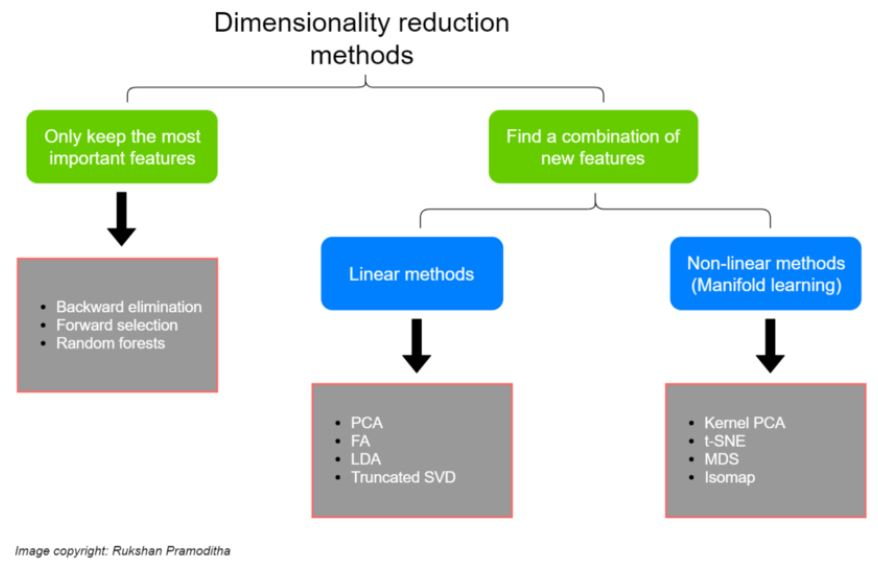

There are mainly two types of dimensionality reduction methods. One way is to only keep the most important features, while the other is to find a combination of new features. By keeping only the most important features, we can implement methods such as backward elimination, forward selection, and random forests. As for finding a combination of new features, this method is further broken down into two categories: linear and non-linear methods (manifold learning). A few examples of linear methods are PCA, FA, LDA, and Truncated SVD. Non-linear method examples are Kernel PCA, t-SNE, MDS, and Isomap. 

LDA is typically used for multi-class classification., but can also be used for reducing dimensionality LDA best separates training instances by their classes. The major difference between LDA and PCA is that LDA finds a linear combination of input features that optimizes class separability while PCA attempts to find a set of uncorrelated components of maximum variance in a dataset. Another major difference is that LDA is a supervised algorithm that takes class labels into account while PCA is an unsupervised algorithm (Pramoditha, 2021). Below shows the code for implementing one of the linear dimensionality reduction methods, LDA(Linear Discriminant Analysis).

___

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)


lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)
___


# References

Brownlee, J. (2017) How to choose a feature selection method for machine learning, Machine Learning Mastery. Available at: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ (Accessed: November 9, 2022).

Pramoditha, R. (2021) 11 dimensionality reduction techniques you should know in 2021, towardsdatascience.com. Available at: https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b (Accessed: November 10, 2022). 